In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [3]:
total_analysts = 14
analyst_chance = 0.156
min_job_time = 15.7
max_job_time = 33.1
node_capacity = 72
node_cost = 130
third_node_cost = 110

def get_maximum_cost():
    maximum_use = total_analysts * max_job_time; 
    maximum_nodes = maximum_use / node_capacity
    maximum_cost = 0
    
    for i in range(math.ceil(maximum_nodes)):
        if i < 2:
            maximum_cost += node_cost
        else:
            maximum_cost += third_node_cost

    print("Maximum cost for 1 day",maximum_cost)
    
get_maximum_cost()

Maximum cost for 1 day 810


In [14]:
def get_cost_by_chance():
    
    nodes_in_use = 0
    day_cost = 0

    for j in range(total_analysts):
        analyst_have_to_work = np.random.random()

        if analyst_have_to_work <= analyst_chance:
            job_time = random.randrange(min_job_time*10, (max_job_time+1)*10) / 10
            nodes_in_use = nodes_in_use + (job_time /node_capacity)

    for i in range(math.ceil(nodes_in_use)):
        if i < 2:
            day_cost += node_cost
        else:
            day_cost += third_node_cost

    return day_cost
        

def get_montecarlo_costs(num_trials: int):
    costs = []
    for i in range(num_trials):
        costs.append(get_cost_by_chance())

    return costs


coste medio 155.551
coste máximo 480


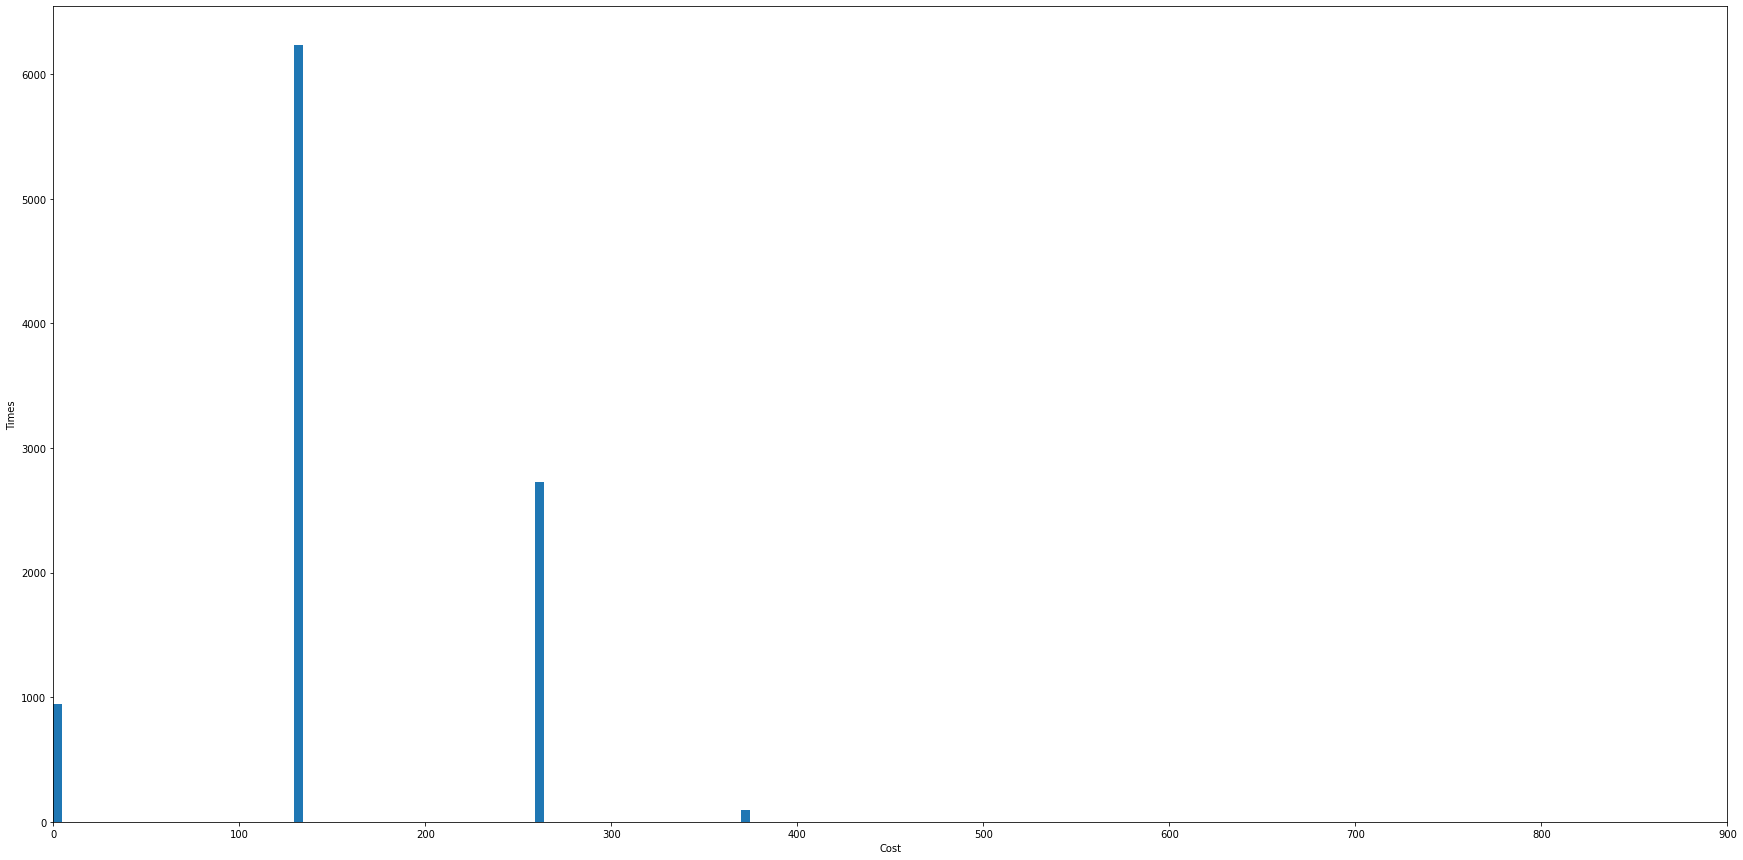

In [35]:
result = get_montecarlo_costs(10000)

plt.figure(figsize=(30, 15))
plt.xlabel('Cost')
plt.ylabel('Times')
plt.xlim(0,900)
_ = plt.hist(result, bins=100)

print("coste medio", sum(result) / len(result))
print("coste máximo", max(result))

coste mínimo 774.73
coste máximo 795.3
coste medio 785.21


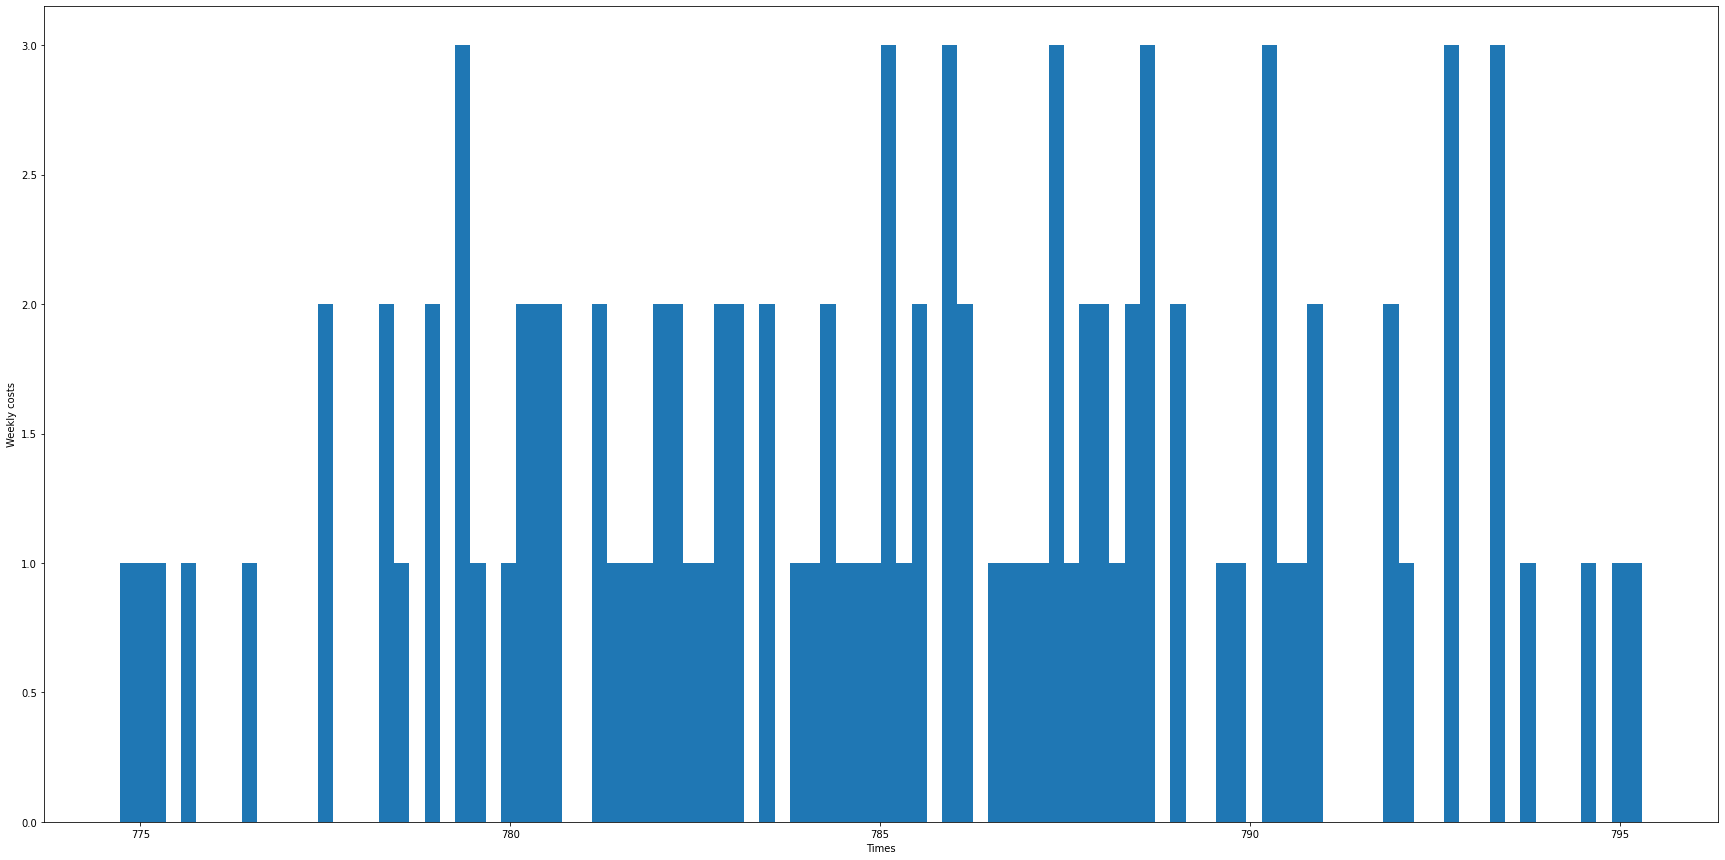

In [63]:
weeks = []

for j in range(100):
    weekcost = 0
    for i in range(5):
        result = get_montecarlo_costs(1000)
        weekcost = weekcost + (sum(result) / len(result))

    weeks.append(weekcost)

print("coste mínimo", round(min(weeks), 2))
print("coste máximo", round(max(weeks), 2))
print("coste medio", round(sum(weeks) / len(weeks), 2))
    
plt.figure(figsize=(30, 15))
plt.xlabel('Times')
plt.ylabel('Weekly costs')
_ = plt.hist(weeks, bins=100)
